# Basic Checks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [3]:
data.columns = [ "Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin", 
                "Alkaline_Phosphotase", "Alamine_Aminotransferase", 
                "Aspartate_Aminotransferase", "Total_Proteins", 
                "Albumin", "Albumin_and_Globulin_Ratio", "Target"]


In [4]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [5]:
data.shape

(582, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Gender                      582 non-null    object 
 2   Total_Bilirubin             582 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        582 non-null    int64  
 5   Alamine_Aminotransferase    582 non-null    int64  
 6   Aspartate_Aminotransferase  582 non-null    int64  
 7   Total_Proteins              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Target                      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [7]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
data['Target'].value_counts(normalize=True)

Target
1    0.713058
2    0.286942
Name: proportion, dtype: float64

 In hower case, with a class distribution of approximately 71% for class 1 and 29% for class 2
so using SMOTE (Synthetic Minority Over-sampling Technique) dealing with imbalanced datasets

# EDA

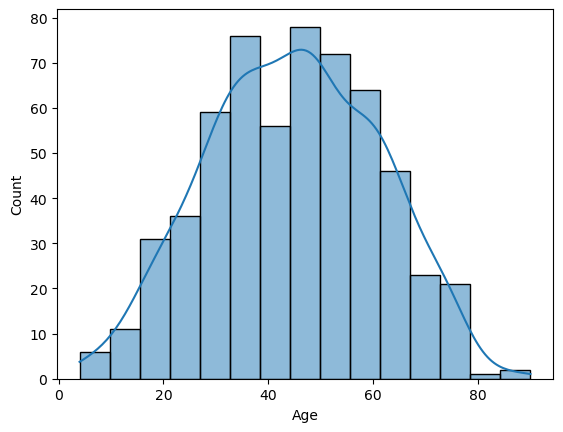

<Figure size 1000x600 with 0 Axes>

In [9]:
sns.histplot(x="Age",data=data,kde=True)
plt.figure(figsize=(10,6))
plt.show()

The distribution may be slightly left-skewed or bell-shaped depending on the population .
Most patients are likely between 30 and 70 years range.

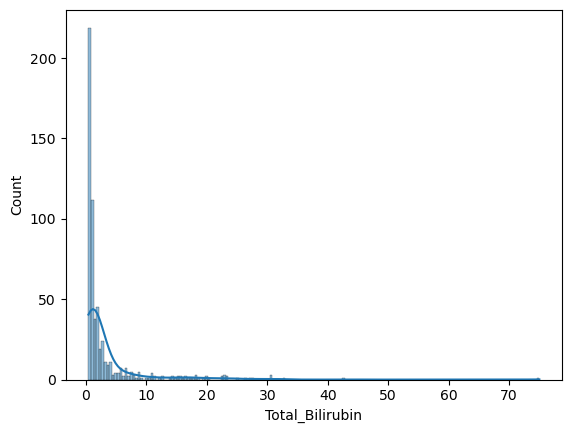

<Figure size 1000x600 with 0 Axes>

In [10]:
sns.histplot(x="Total_Bilirubin",data=data,kde=True)
plt.figure(figsize=(10,6))
plt.show()

1. Most Patients have mild elevation.
(The majority of values cluster below 2 mg/dL)
2. A small no. of patients have very high bilirubin so it has outliers.
3. The data is right skewed.

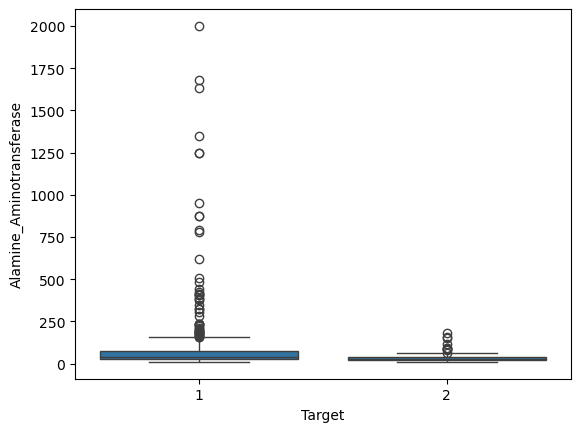

<Figure size 1000x600 with 0 Axes>

In [11]:
sns.boxplot(x="Target", y="Alamine_Aminotransferase",data=data)
plt.figure(figsize=(10,6))
plt.show()

Patients with liver disease(1) likely to have a higher median ALT level.
Liver patients have too many outliers.

C:\Users\mvara\AppData\Local\Temp\ipykernel_11392\1856560843.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x="Gender",hue='Target',data=data,color="skyblue")


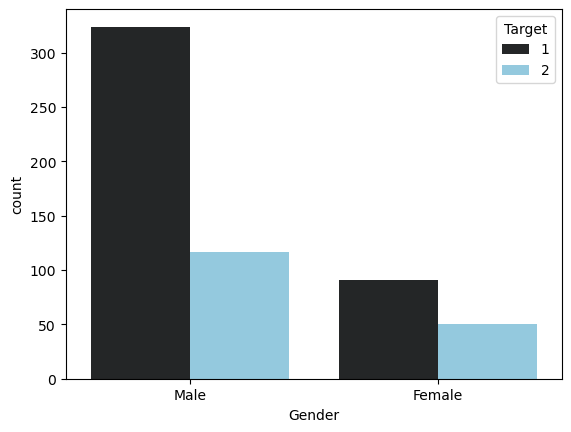

In [12]:
sns.countplot(x="Gender",hue='Target',data=data,color="skyblue")
plt.show()

1. Males with liver disease has higher count than female liver patients.
2. This dataset is likely imbalanced with more liver patients than non-liver patients.

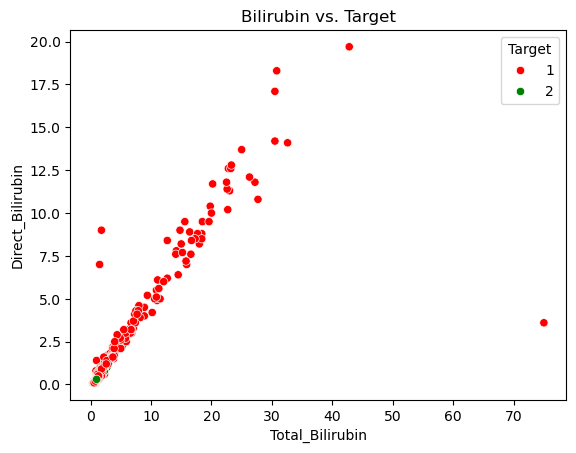

In [13]:
sns.scatterplot(x='Total_Bilirubin', y='Direct_Bilirubin', hue='Target', data=data,palette={1: "red", 2: "green"})
plt.title('Bilirubin vs. Target')
plt.show()

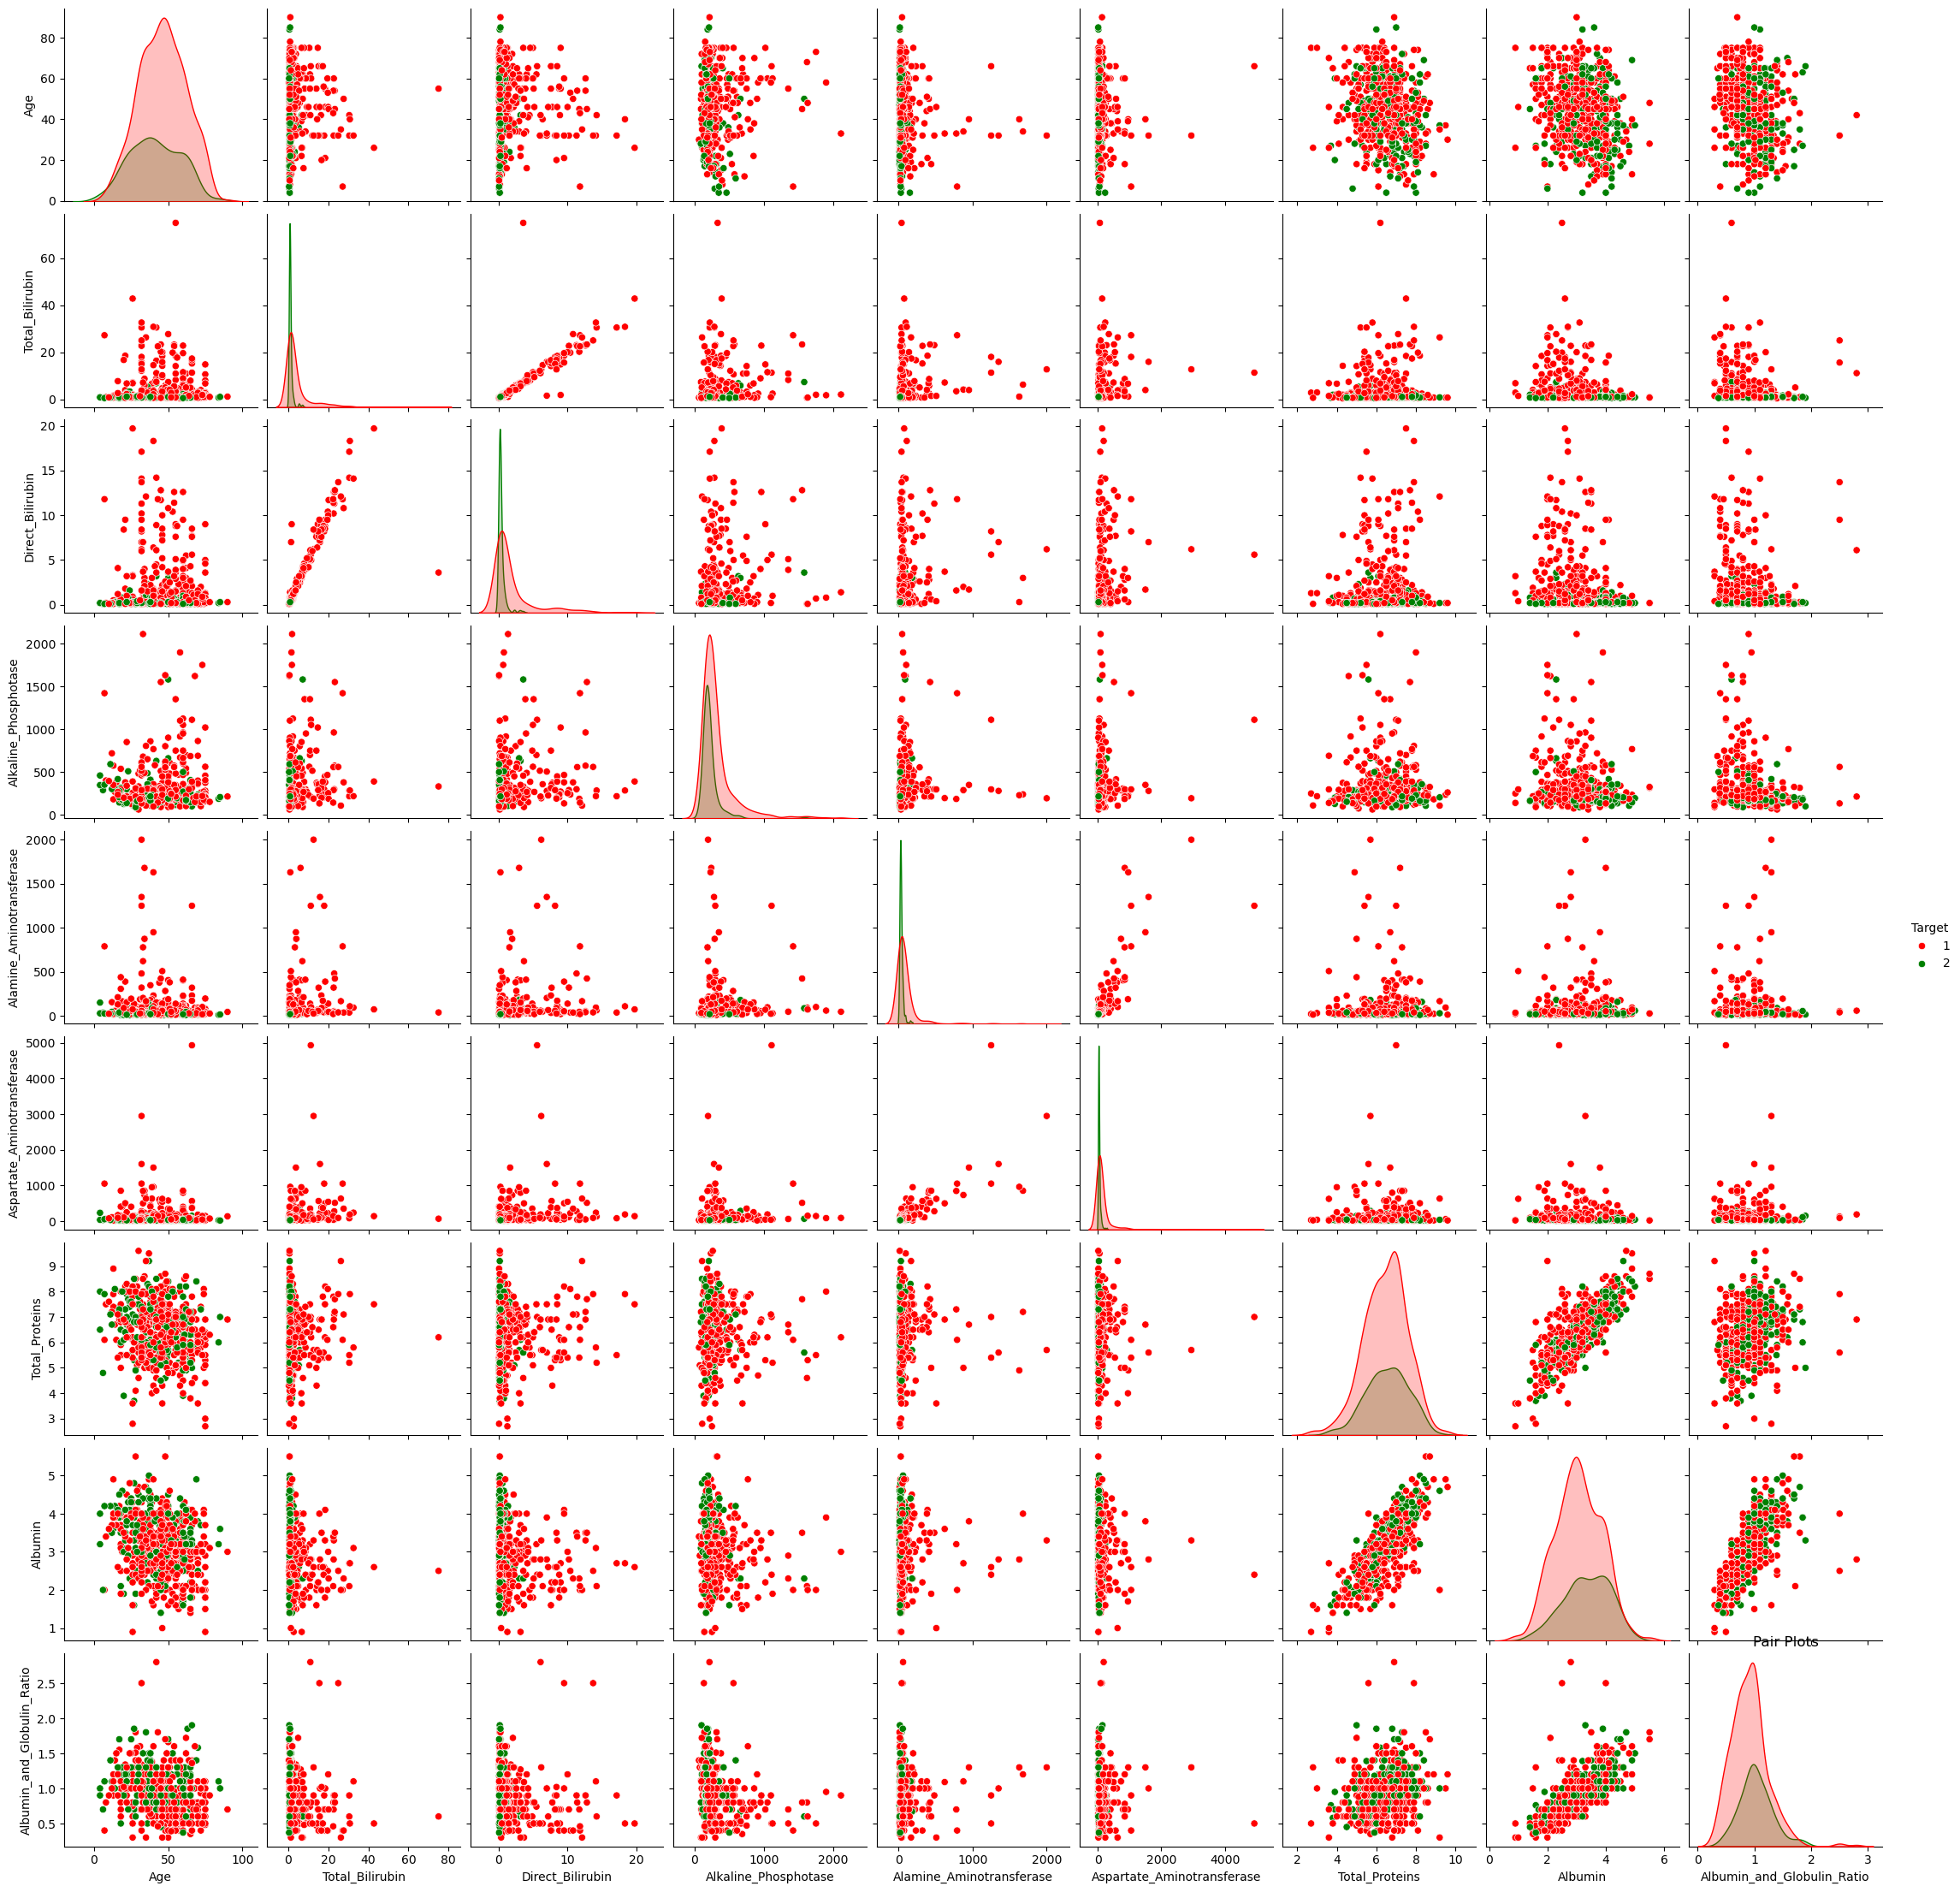

In [14]:
sns.pairplot(data, hue='Target',palette={1: "red", 2: "green"})
plt.title('Pair Plots')
plt.show()

## Data Preprocessing & Feature Engineering

In [15]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Gender                      582 non-null    object 
 2   Total_Bilirubin             582 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        582 non-null    int64  
 5   Alamine_Aminotransferase    582 non-null    int64  
 6   Aspartate_Aminotransferase  582 non-null    int64  
 7   Total_Proteins              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Target                      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [17]:
 data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

C:\Users\mvara\AppData\Local\Temp\ipykernel_11392\2942366351.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(), inplace=True)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Gender                      582 non-null    object 
 2   Total_Bilirubin             582 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        582 non-null    int64  
 5   Alamine_Aminotransferase    582 non-null    int64  
 6   Aspartate_Aminotransferase  582 non-null    int64  
 7   Total_Proteins              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  582 non-null    float64
 10  Target                      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [19]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [20]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [21]:
 from sklearn.preprocessing import StandardScaler 

In [22]:
features = data.drop(['Target', 'Gender'], axis=1)
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [23]:
processed_data = scaled_features.copy()
processed_data[['Target', 'Gender']] = data[['Target', 'Gender']]

In [24]:
processed_data

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target,Gender
0,1.069313,1.223586,1.428648,1.680715,-0.092140,-0.034853,0.937332,0.073438,-0.650406,1,1
1,1.069313,0.643743,0.930056,0.820279,-0.114045,-0.145620,0.476661,0.199146,-0.179428,1,1
2,0.821911,-0.370981,-0.387651,-0.447733,-0.365961,-0.311772,0.292392,0.324855,0.165956,1,1
3,1.687818,0.096115,0.182168,-0.394213,-0.294768,-0.176774,0.753063,-0.932229,-1.717957,1,1
4,0.079704,-0.242127,-0.280810,-0.340693,-0.338579,-0.332540,1.029466,1.581939,1.107913,1,1
...,...,...,...,...,...,...,...,...,...,...,...
577,0.945612,-0.451514,-0.494492,0.861448,-0.333103,-0.263311,-0.536817,-1.937897,-1.812153,2,1
578,-0.291399,-0.435407,-0.494492,-0.793554,-0.250956,-0.273695,-0.444683,0.073438,0.479942,1,1
579,0.450807,-0.403194,-0.458878,-0.188367,-0.179762,-0.211388,-0.076145,0.073438,0.165956,1,1
580,-0.848054,-0.322660,-0.352037,-0.439499,-0.283815,-0.270234,0.292392,0.324855,0.165956,1,1


In [25]:
processed_data["Gender"].unique()

array([1, 0], dtype=int64)

## Feature Selection

In [26]:
X = processed_data.drop('Target', axis=1)
X.head()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Gender
0,1.069313,1.223586,1.428648,1.680715,-0.092140,-0.034853,0.937332,0.073438,-0.650406,1
1,1.069313,0.643743,0.930056,0.820279,-0.114045,-0.145620,0.476661,0.199146,-0.179428,1
2,0.821911,-0.370981,-0.387651,-0.447733,-0.365961,-0.311772,0.292392,0.324855,0.165956,1
3,1.687818,0.096115,0.182168,-0.394213,-0.294768,-0.176774,0.753063,-0.932229,-1.717957,1
4,0.079704,-0.242127,-0.280810,-0.340693,-0.338579,-0.332540,1.029466,1.581939,1.107913,1


In [27]:
y=processed_data.Target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [28]:
corr_matrix = X.corr()


#### Correlation Heatmap of Liver Patient input only

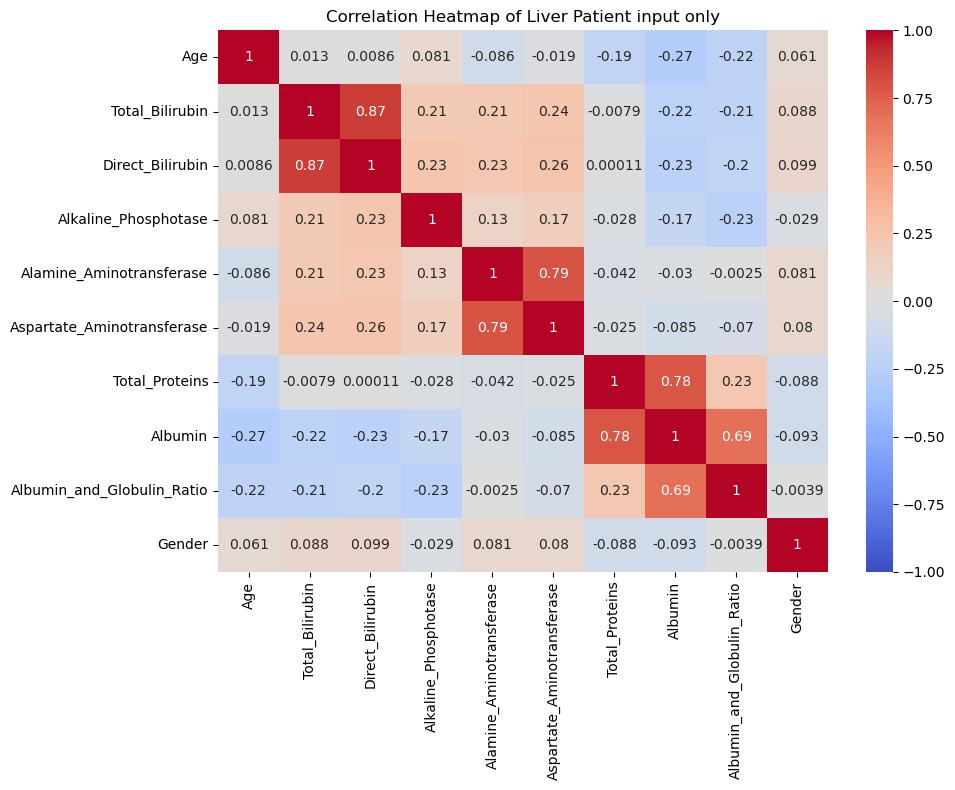

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlation Heatmap of Liver Patient input only")
plt.tight_layout()
plt.show()

Total_Bilirubin and Direct_Bilirubin are highly correlated (0.87) — we keep only one.
Reduce multicollinearity and improve model interpretability.
same to do for Alamine_Aminotransferase,Aspartate_Aminotransferase and Albumin

In [30]:
X.drop(columns=['Direct_Bilirubin','Alamine_Aminotransferase','Albumin'],axis=1)

,Age,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Proteins,Albumin_and_Globulin_Ratio,Gender
0,1.069313,1.223586,1.680715,-0.034853,0.937332,-0.650406,1
1,1.069313,0.643743,0.820279,-0.145620,0.476661,-0.179428,1
2,0.821911,-0.370981,-0.447733,-0.311772,0.292392,0.165956,1
3,1.687818,0.096115,-0.394213,-0.176774,0.753063,-1.717957,1
4,0.079704,-0.242127,-0.340693,-0.332540,1.029466,1.107913,1
...,...,...,...,...,...,...,...
577,0.945612,-0.451514,0.861448,-0.263311,-0.536817,-1.812153,1
578,-0.291399,-0.435407,-0.793554,-0.273695,-0.444683,0.479942,1
579,0.450807,-0.403194,-0.188367,-0.211388,-0.076145,0.165956,1
580,-0.848054,-0.322660,-0.439499,-0.270234,0.292392,0.165956,1


##### Correlation Heatmap of Liver Patient dataset 

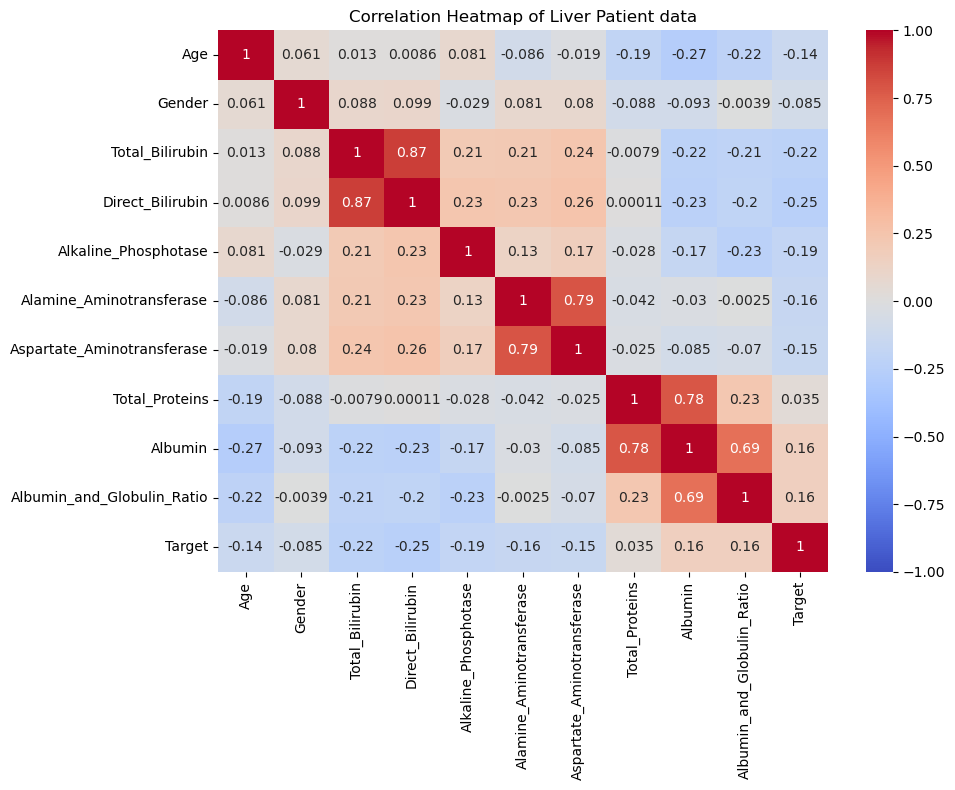

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlation Heatmap of Liver Patient data")
plt.tight_layout()
plt.show()

there are same +ve and same -ve moderate correlation to Target so keep for modeling
but Gender has no correlation to Target so we drop it

In [32]:
X.drop('Gender',axis=1)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio
0,1.069313,1.223586,1.428648,1.680715,-0.092140,-0.034853,0.937332,0.073438,-0.650406
1,1.069313,0.643743,0.930056,0.820279,-0.114045,-0.145620,0.476661,0.199146,-0.179428
2,0.821911,-0.370981,-0.387651,-0.447733,-0.365961,-0.311772,0.292392,0.324855,0.165956
3,1.687818,0.096115,0.182168,-0.394213,-0.294768,-0.176774,0.753063,-0.932229,-1.717957
4,0.079704,-0.242127,-0.280810,-0.340693,-0.338579,-0.332540,1.029466,1.581939,1.107913
...,...,...,...,...,...,...,...,...,...
577,0.945612,-0.451514,-0.494492,0.861448,-0.333103,-0.263311,-0.536817,-1.937897,-1.812153
578,-0.291399,-0.435407,-0.494492,-0.793554,-0.250956,-0.273695,-0.444683,0.073438,0.479942
579,0.450807,-0.403194,-0.458878,-0.188367,-0.179762,-0.211388,-0.076145,0.073438,0.165956
580,-0.848054,-0.322660,-0.352037,-0.439499,-0.283815,-0.270234,0.292392,0.324855,0.165956


In [33]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Gender
0,1.069313,1.223586,1.428648,1.680715,-0.092140,-0.034853,0.937332,0.073438,-0.650406,1
1,1.069313,0.643743,0.930056,0.820279,-0.114045,-0.145620,0.476661,0.199146,-0.179428,1
2,0.821911,-0.370981,-0.387651,-0.447733,-0.365961,-0.311772,0.292392,0.324855,0.165956,1
3,1.687818,0.096115,0.182168,-0.394213,-0.294768,-0.176774,0.753063,-0.932229,-1.717957,1
4,0.079704,-0.242127,-0.280810,-0.340693,-0.338579,-0.332540,1.029466,1.581939,1.107913,1


so done with Feature Selection

## Modeling:

In [34]:
# first spilte the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)



In [35]:
X_train.shape

(407, 10)

In [36]:
y_train.value_counts(normalize=True)

Target
1    0.702703
2    0.297297
Name: proportion, dtype: float64

In [37]:
y_test.value_counts(normalize=True)

Target
1    0.737143
2    0.262857
Name: proportion, dtype: float64

no need to balance the test but we need balance the train data becouse model train only majority class that reduce model prediction by classes

SMOTE balances this by:

Undersampling the majority class: that is 1

Oversampling the minority class: by synthetically generating new examples of the minority class using interpolation.here is 2

In [38]:
smote = SMOTE(random_state=2)
X_train_new, y_train_new= smote.fit_resample(X_train, y_train)

In [39]:
# just check it 
y_train_new.value_counts(normalize=True)

Target
2    0.5
1    0.5
Name: proportion, dtype: float64

ohh we got it what we want balances data

### 1)  Random Forest Classifier

#### using imbalance and data

In [40]:
model_rfc= RandomForestClassifier(random_state=42)
model_rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [41]:
pred_rfc=model_rfc.predict(X_test)

In [43]:
rfc=accuracy_score(pred_rfc,y_test)
rfc

0.7371428571428571

In [45]:
confusion_matrix(pred_rfc,y_test)

array([[113,  30],
       [ 16,  16]], dtype=int64)

In [47]:
print(classification_report(pred_rfc,y_test))

              precision    recall  f1-score   support

           1       0.88      0.79      0.83       143
           2       0.35      0.50      0.41        32

    accuracy                           0.74       175
   macro avg       0.61      0.65      0.62       175
weighted avg       0.78      0.74      0.75       175



### 2)   Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
model_lr= LogisticRegression()

In [94]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [95]:
pred_rf=model_lr.predict(X_test)
pred_rf

array([1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [96]:
y_test

577    2
280    2
104    2
447    1
434    2
      ..
277    1
581    2
558    1
478    1
211    2
Name: Target, Length: 175, dtype: int64

In [97]:
lg=accuracy_score(pred_rf,y_test)
lg

0.7257142857142858

In [98]:
confusion_matrix(pred_rf,y_test)

array([[118,  37],
       [ 11,   9]], dtype=int64)

In [54]:
print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           1       0.91      0.76      0.83       155
           2       0.20      0.45      0.27        20

    accuracy                           0.73       175
   macro avg       0.56      0.61      0.55       175
weighted avg       0.83      0.73      0.77       175



### 3) Gradient Boosting Classifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

# Make sure gbc is the classifier, not a DataFrame
model_gbc = GradientBoostingClassifier()

# Then fit the model
model_gbc.fit(X_train, y_train)


GradientBoostingClassifier()

In [60]:
pred_gbc=model_gbc.predict(X_test)

In [61]:
gbc=accuracy_score(pred_gbc,y_test)
gbc

0.7028571428571428

In [62]:
confusion_matrix(pred_gbc,y_test)

array([[109,  32],
       [ 20,  14]], dtype=int64)

In [63]:
print(classification_report(pred_gbc,y_test))

              precision    recall  f1-score   support

           1       0.84      0.77      0.81       141
           2       0.30      0.41      0.35        34

    accuracy                           0.70       175
   macro avg       0.57      0.59      0.58       175
weighted avg       0.74      0.70      0.72       175



### 4) KNeighbors Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier

model_kn = KNeighborsClassifier()

In [65]:
model_kn.fit(X_train, y_train)
pred_kn=model_kn.predict(X_test)

In [66]:
knn=accuracy_score(y_test,pred_kn)
knn

0.6971428571428572

In [67]:
confusion_matrix(y_test,pred_kn)

array([[104,  25],
       [ 28,  18]], dtype=int64)

In [68]:
print(classification_report(pred_kn,y_test))

              precision    recall  f1-score   support

           1       0.81      0.79      0.80       132
           2       0.39      0.42      0.40        43

    accuracy                           0.70       175
   macro avg       0.60      0.60      0.60       175
weighted avg       0.70      0.70      0.70       175



### 5) Decision tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
model_dtc=DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
pred_dtc=model_dtc.predict(X_test)

In [70]:
dt=accuracy_score(y_test,pred_dtc)
dt

0.6628571428571428

In [71]:
pd.crosstab(y_test,pred_dtc)

col_0,1,2
Target,,
1,99,30
2,29,17


In [72]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           1       0.77      0.77      0.77       129
           2       0.36      0.37      0.37        46

    accuracy                           0.66       175
   macro avg       0.57      0.57      0.57       175
weighted avg       0.67      0.66      0.66       175



### 6) SupportVectorMachine¶


In [103]:
from sklearn.svm import SVC
model_svm= SVC()
model_svm.fit(X_train,y_train)
y_predict=model_svm.predict(X_test)
svm=accuracy_score(y_test,y_predict)
svm

0.7371428571428571

In [74]:
pd.crosstab(y_test,y_predict)

col_0,1
Target,
1,129
2,46


In [75]:
print(classification_report(pred_dtc,y_test))

              precision    recall  f1-score   support

           1       0.77      0.77      0.77       128
           2       0.37      0.36      0.37        47

    accuracy                           0.66       175
   macro avg       0.57      0.57      0.57       175
weighted avg       0.66      0.66      0.66       175



In [76]:
results= [['KNN Classifier', knn], ['Gradient Boosting Classifier', gbc], ['RandomForestClassifier', rfc],
              ['DecisionTreeClassifier', dt],['LogisticRegression',lg],['SVM',svm]]

Liverpatient_predi= pd.DataFrame(results, columns = ['classification models', 'accuracy_score'])
Liverpatient_predi

,classification models,accuracy_score
0,KNN Classifier,0.697143
1,Gradient Boosting Classifier,0.702857
2,RandomForestClassifier,0.737143
3,DecisionTreeClassifier,0.662857
4,LogisticRegression,0.725714
5,SVM,0.737143


C:\Users\mvara\AppData\Local\Temp\ipykernel_11392\471419289.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="classification models", y="accuracy_score",  data=Liverpatient_predi,palette = "mako")


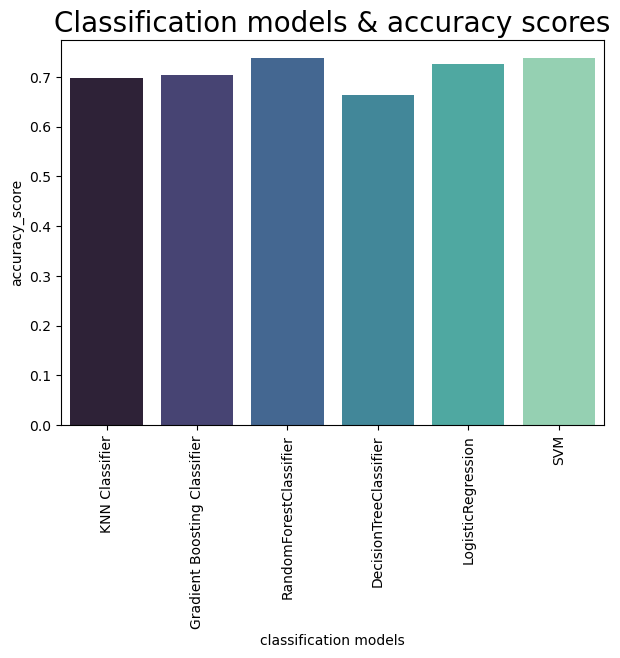

In [77]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores',fontsize=20)
sns.barplot(x="classification models", y="accuracy_score",  data=Liverpatient_predi,palette = "mako")
plt.show();

#### Summary of Results (Class 2 Metrics):
Model Precision (2) Recall (2) F1-Score (2) Random Forest 0.35 0.50 0.41

KNN 0.41 0.72 0.52 ✅

Decision Tree 0.37 0.78 0.50

Logistic Regression 0.38 0.80 0.52

SVM 0.41 0.46 0.43

Gradient Boosting 0.35 0.50 0.41

##### Best Model: Logistic Regression or KNN
Both Logistic Regression and KNN:

Have F1-score of 0.52 for class 2 (minority).

Have strong recall (80% and 72%) — important in medical scenarios (better to catch more real positives).

Precision is modest, but acceptable for a trade-off.

Key Points : Class Imbalance Awareness:

Mention that the dataset is imbalanced: class 2 is underrepresented.

Used original (imbalanced) data without resampling.

Evaluation Criteria:

Accuracy is misleading here.

Focus on F1-score for class 2, especially due to medical relevance.

Model Comparison Table:

Include the table above to summarize metrics.

Highlight that Logistic Regression and KNN performed best for the minority class.

Recommendation:

Recommend Logistic Regression (or KNN) for deployment or further tuning.




### As this dataset is imabalanced using SMOTE to Balance the data.¶


In [78]:
smote = SMOTE(random_state=2)
X_train_new, y_train_new= smote.fit_resample(X_train, y_train)

In [79]:
y_train_new.value_counts()

Target
2    286
1    286
Name: count, dtype: int64

### 1.Random Forest Classifier¶


In [80]:
model_rfc.fit(X_train_new, y_train_new)
y_predict=model_rfc.predict(X_test)
rfc1=accuracy_score(y_test,y_predict)
rfc1


0.6857142857142857

In [81]:
pd.crosstab(y_test, y_predict)

col_0,1,2
Target,,
1,100,29
2,26,20


In [82]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.79      0.78      0.78       129
           2       0.41      0.43      0.42        46

    accuracy                           0.69       175
   macro avg       0.60      0.60      0.60       175
weighted avg       0.69      0.69      0.69       175



### 2.KNeighborsClassifier¶


In [83]:
model_kn.fit(X_train_new, y_train_new)
y_predict = model_kn.predict(X_test)
knn1=(accuracy_score(y_test, y_predict))
knn1

0.6514285714285715

In [84]:
pd.crosstab(y_test,y_predict)


col_0,1,2
Target,,
1,81,48
2,13,33


In [85]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           1       0.86      0.63      0.73       129
           2       0.41      0.72      0.52        46

    accuracy                           0.65       175
   macro avg       0.63      0.67      0.62       175
weighted avg       0.74      0.65      0.67       175



### 3) DecisionTreeClassifier

In [89]:
model_dtc.fit(X_train_new, y_train_new)
y_predict=model_dtc.predict(X_test)
dtc1=accuracy_score(y_test,y_predict)
dtc1

0.6685714285714286

In [90]:
pd.crosstab(y_test,y_predict)


col_0,1,2
Target,,
1,100,29
2,29,17


In [91]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           1       0.78      0.78      0.78       129
           2       0.37      0.37      0.37        46

    accuracy                           0.67       175
   macro avg       0.57      0.57      0.57       175
weighted avg       0.67      0.67      0.67       175



### 4)  LogisticRegression

In [100]:
model_lr.fit(X_train_new, y_train_new)
y_predict=model_lr.predict(X_test)
logi1=accuracy_score(y_test, y_predict)
logi1

0.5885714285714285

In [101]:
pd.crosstab(y_test,y_predict)

col_0,1,2
Target,,
1,67,62
2,10,36


In [102]:
print(classification_rceport(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.87      0.52      0.65       129
           2       0.37      0.78      0.50        46

    accuracy                           0.59       175
   macro avg       0.62      0.65      0.58       175
weighted avg       0.74      0.59      0.61       175



### 5) SupportVectorMachine

In [105]:
model_svm.fit(X_train_new,y_train_new)
y_predict=model_svm.predict(X_test)
svm1=accuracy_score(y_test,y_predict)
svm1

0.6057142857142858

In [106]:
pd.crosstab(y_test,y_predict)


col_0,1,2
Target,,
1,69,60
2,9,37


In [107]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           1       0.88      0.53      0.67       129
           2       0.38      0.80      0.52        46

    accuracy                           0.61       175
   macro avg       0.63      0.67      0.59       175
weighted avg       0.75      0.61      0.63       175



### 6) Gradient Boosting Classifier

In [109]:
model_gbc.fit(X_train_new,y_train_new)
pred_gbc=model_gbc.predict(X_test)
gbc1=accuracy_score(y_test,pred_gbc)

In [110]:
gbc1

0.6857142857142857

In [112]:
pd.crosstab(y_test,pred_gbc)


col_0,1,2
Target,,
1,99,30
2,25,21


In [113]:
print(classification_report(y_test,pred_gbc))

              precision    recall  f1-score   support

           1       0.80      0.77      0.78       129
           2       0.41      0.46      0.43        46

    accuracy                           0.69       175
   macro avg       0.61      0.61      0.61       175
weighted avg       0.70      0.69      0.69       175



In [116]:
acc_smote= [['KNN Classifier', knn1], ['Gradient Boosting Classifier', gbc1], ['RandomForestClassifier', rfc1],
              ['DecisionTreeClassifier', dtc1],['LogisticRegression',logi1],['Support Vector machine',svm1]]

Liverpatient_pred= pd.DataFrame(acc_smote, columns = ['classification models', 'accuracy_score'])
Liverpatient_pred

,classification models,accuracy_score
0,KNN Classifier,0.651429
1,Gradient Boosting Classifier,0.685714
2,RandomForestClassifier,0.685714
3,DecisionTreeClassifier,0.668571
4,LogisticRegression,0.588571
5,Support Vector machine,0.605714


C:\Users\mvara\AppData\Local\Temp\ipykernel_11392\2811498452.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="classification models", y="accuracy_score",  data=Liverpatient_pred,palette ="Set2")


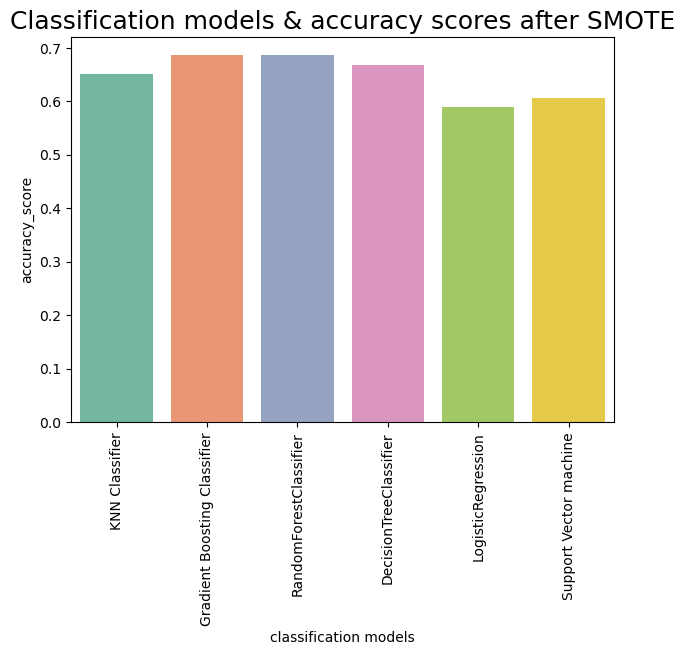

In [117]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE',fontsize=18)
sns.barplot(x="classification models", y="accuracy_score",  data=Liverpatient_pred,palette ="Set2")
plt.show();

Problem Type:

This is a binary classification problem with class imbalance (class 2 is the minority class).

Accuracy alone is not a reliable metric; focus on recall, precision, and F1-score for class 2.

SMOTE Usage:

Applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data.

Helps improve the classifier's ability to detect the minority class.

Best Performing Models (based on F1-score for class 2):

K-Nearest Neighbors (KNN): F1-score = 0.52 (Stable with and without SMOTE)

SVM: F1-score improved from 0.43 (imbalanced) to 0.52 (SMOTE) ✅

Logistic Regression: High recall (0.80) and good F1-score (0.50) with SMOTE

Random Forest & Gradient Boosting:

Good overall accuracy (~69%)

But lower F1-score for class 2 (only around 0.41–0.43)

These models favor the majority class more

Decision Tree:

F1-score for class 2 decreased after SMOTE (from 0.50 to 0.37)

Not ideal for this specific task

Key Metric to Focus On:

Prioritize F1-score and recall of class 2 to ensure correct identification of patients at risk

Final Recommendation:

Use SVM or KNN with SMOTE for the best balance of performance

Logistic Regression is also a strong and interpretable alternative